# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

## Perform API Calls

In [ ]:
counter_record = 1
counter_set = 1
citylist = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

print("Beginning Data Retrieval     ")
print("-------------------------------")

for i, city in enumerate(cities):    
    if (i % 50 == 0 and i >= 50):
        counter_set += 1
        counter_record = 0
    city_url = url + "&q=" + city 
    print("Processing Record %s of Set %s | %s" % (counter_record, counter_set, city))
    counter_record += 1

    try:
        weather_request_data = requests.get(city_url).json()
        latit = weather_request_data["coord"]["lat"]
        longit = weather_request_data["coord"]["lon"]
        temp_maximum = weather_request_data["main"]["temp_max"]
        humidity = weather_request_data["main"]["humidity"]
        clouds = weather_request_data["clouds"]["all"]
        windspeed = weather_request_data["wind"]["speed"]
        country = weather_request_data["sys"]["country"]
        date = weather_request_data["dt"]
        citylist.append({"City": city,"Lat": latit,"Lng": longit, "Max Temp": temp_maximum,"Humidity": humidity,"Cloudiness": clouds,"Wind Speed": windspeed,"Country": country,"Date": date})
    except:
        print("City not found. Skipping...")
        pass
              
print("-------------------------------")
print("Data Retrieval Complete      ")
print("-------------------------------")
        
        

Beginning Data Retrieval     
-------------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | sorong
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | kanye
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | biankouma
Processing Record 8 of Set 1 | barrow
Processing Record 9 of Set 1 | bukoba
Processing Record 10 of Set 1 | ozerki
Processing Record 11 of Set 1 | tasiilaq
Processing Record 12 of Set 1 | rize
Processing Record 13 of Set 1 | houma
Processing Record 14 of Set 1 | hithadhoo
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | novo aripuana
Processing Record 18 of Set 1 | jamestown
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | rikitea
Processing Record 22 of Set 1 | djambala
Processing Record 23 of Set 1 | bredasdorp
Process

Processing Record 37 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 38 of Set 4 | kahului
Processing Record 39 of Set 4 | dolores
Processing Record 40 of Set 4 | dalvik
Processing Record 41 of Set 4 | coquimbo
Processing Record 42 of Set 4 | vestmannaeyjar
Processing Record 43 of Set 4 | bien hoa
Processing Record 44 of Set 4 | constantine
Processing Record 45 of Set 4 | berbera
City not found. Skipping...
Processing Record 46 of Set 4 | salalah
Processing Record 47 of Set 4 | santarem
City not found. Skipping...
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | sitka
Processing Record 0 of Set 5 | hastings
Processing Record 1 of Set 5 | bull savanna
Processing Record 2 of Set 5 | kruisfontein
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | vao
Processing Record 5 of Set 5 | airai
Processing Record 6 of Set 5 | kalmunai
Processing Record 7 of Set 5 | krasnoselkup
City not found. Skipping...
Proce

In [15]:
df1 = pd.DataFrame(citylist)
latitude_array = df1["Lat"]
temperature_maximum_array = df1["Max Temp"]
humidity_array = df1["Humidity"]
cloudiness_array = df1["Cloudiness"]
wind_speed_array = df1["Wind Speed"]
df1.to_csv(output_data_file, index_label="City_ID")
df1.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [16]:
df1.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,90,CA,1571197056,80,62.45,-114.38,33.80,14.99
1,sorong,31,ID,1571197056,90,-0.86,131.25,81.77,2.81
2,san patricio,100,PY,1571197057,93,-26.98,-56.83,61.25,4.39
3,bluff,0,AU,1571197057,28,-23.58,149.07,92.57,9.48
4,kanye,59,BW,1571197057,74,-24.98,25.34,63.05,4.05


## Latitude vs. Temperature Plot

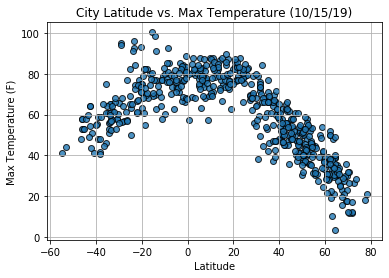

In [17]:
plt.scatter(latitude_array, temperature_maximum_array,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

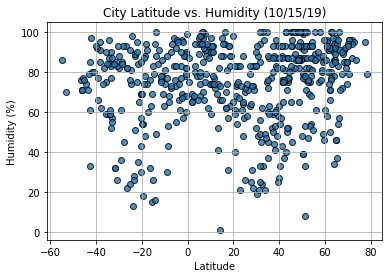

In [18]:
plt.scatter(latitude_array, humidity_array,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

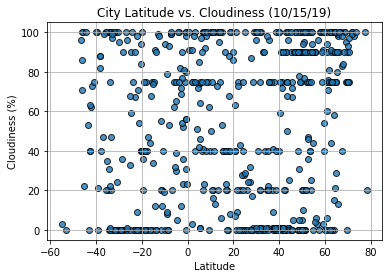

In [19]:
plt.scatter(latitude_array, cloudiness_array,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

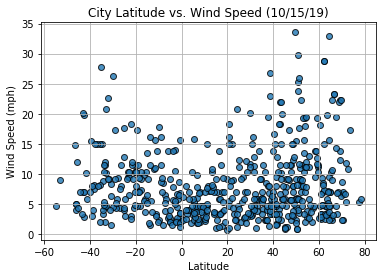

In [20]:
plt.scatter(latitude_array, wind_speed_array,edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Fig4.png")
plt.show()